# Lab 4: Working with 'real' data
## Getting data and HD5

In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
from scipy.stats import norm
from scipy.stats import poisson

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

In [3]:
hf = h5py.File('gammaray_lab4.h5', 'r')

In [4]:
hf.keys()

<KeysViewHDF5 ['data']>

In [5]:
data = np.array(hf.get('data'))

In [6]:
data[:,0]

array([9.40680016e+08, 3.15000000e+02, 4.50000000e+01, 1.00000000e+01])

## Problem 1

#### 1)

In [7]:
t = data[0,:]
solar_deg = data[1,:]
earth_long = data[2,:]
counts = data[3,:]

In [8]:
def rangePlot(x, y, start, end):
    fig, ax = plt.subplots(1, 1)
    ax.plot(x[start:end], y[start:end], 'bo', label='scatter plot of the first 1000 points')
    plt.show()

In [9]:
def samplePlot(x, y, size):
    fig, ax = plt.subplots(1, 1)
    ax.plot(x[0:len(x):size], y[0:len(y):size], 'bo', label='scatter plot every other size values')
    plt.show()

In [10]:
def samplePlotLine(x, y, size):
    fig, ax = plt.subplots(1, 1)
    ax.plot(x[0:len(x):size], y[0:len(y):size], 'b-', label='scatter plot every other size values')
    plt.yscale('log')
    plt.show()

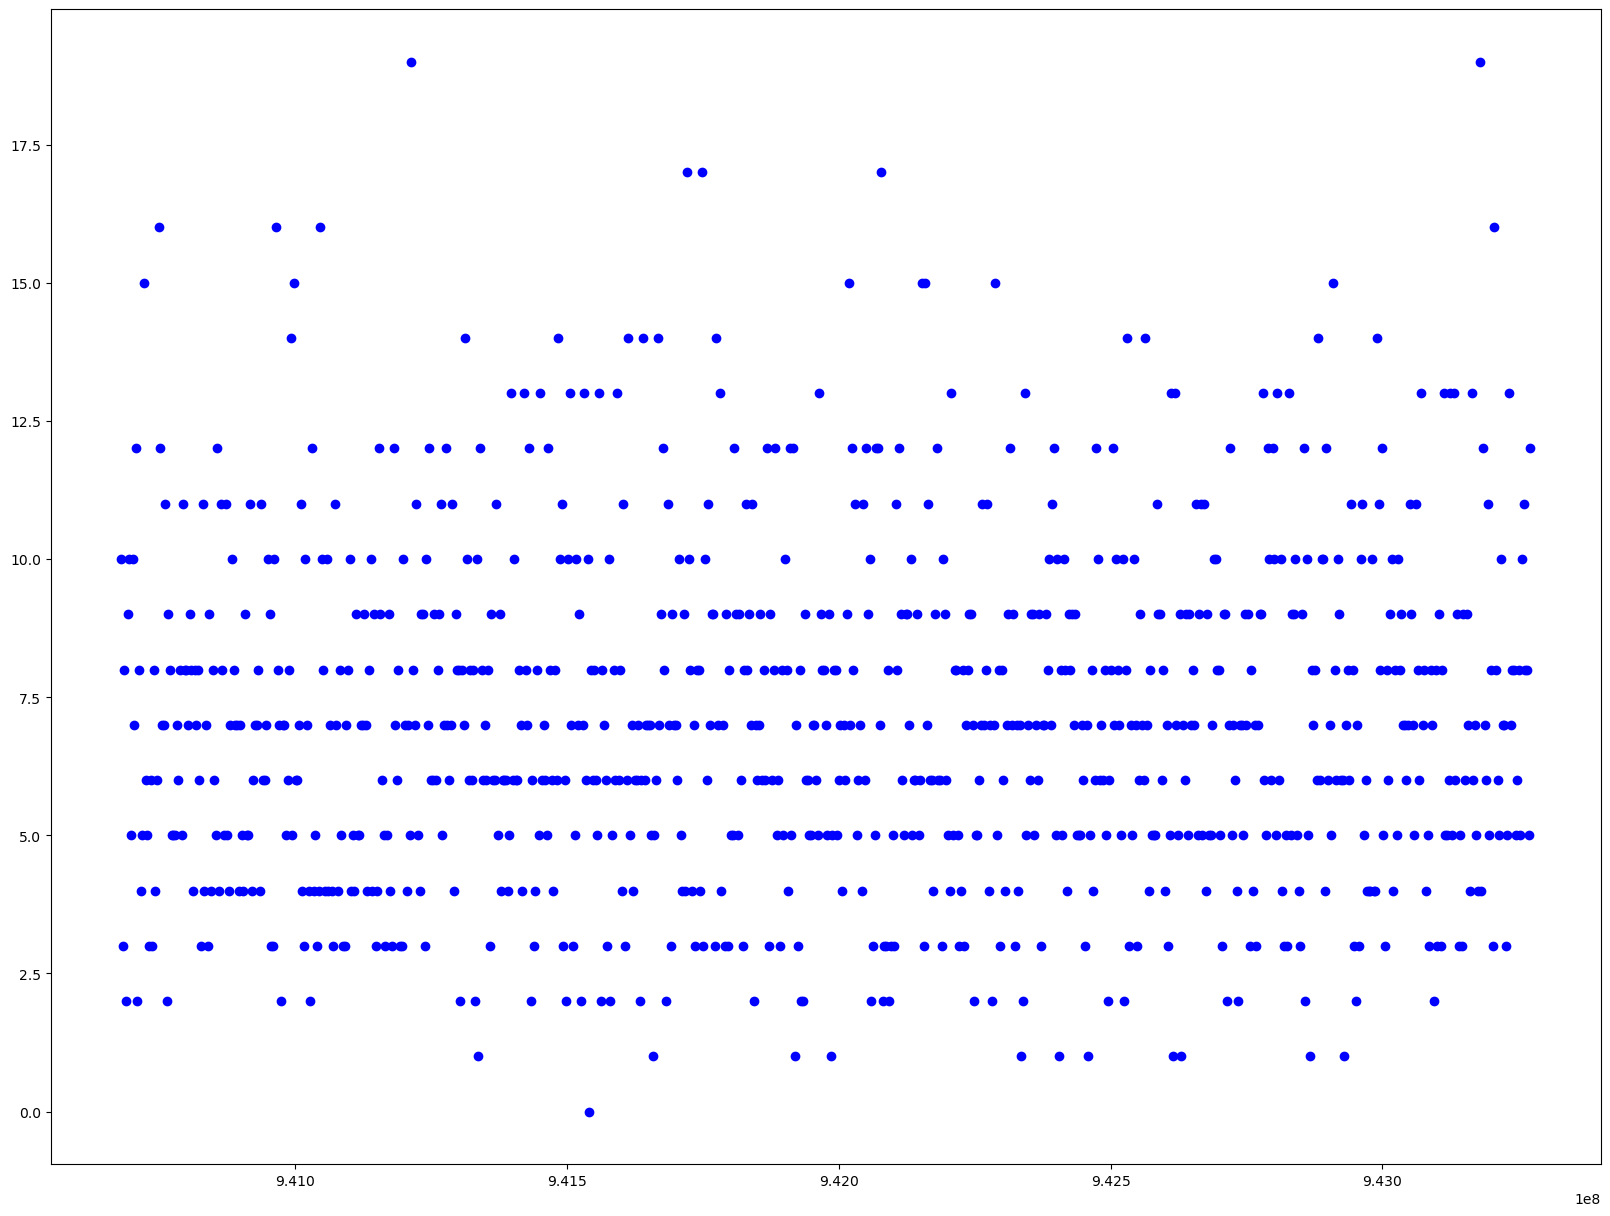

In [11]:
samplePlot(t, counts, 30000)

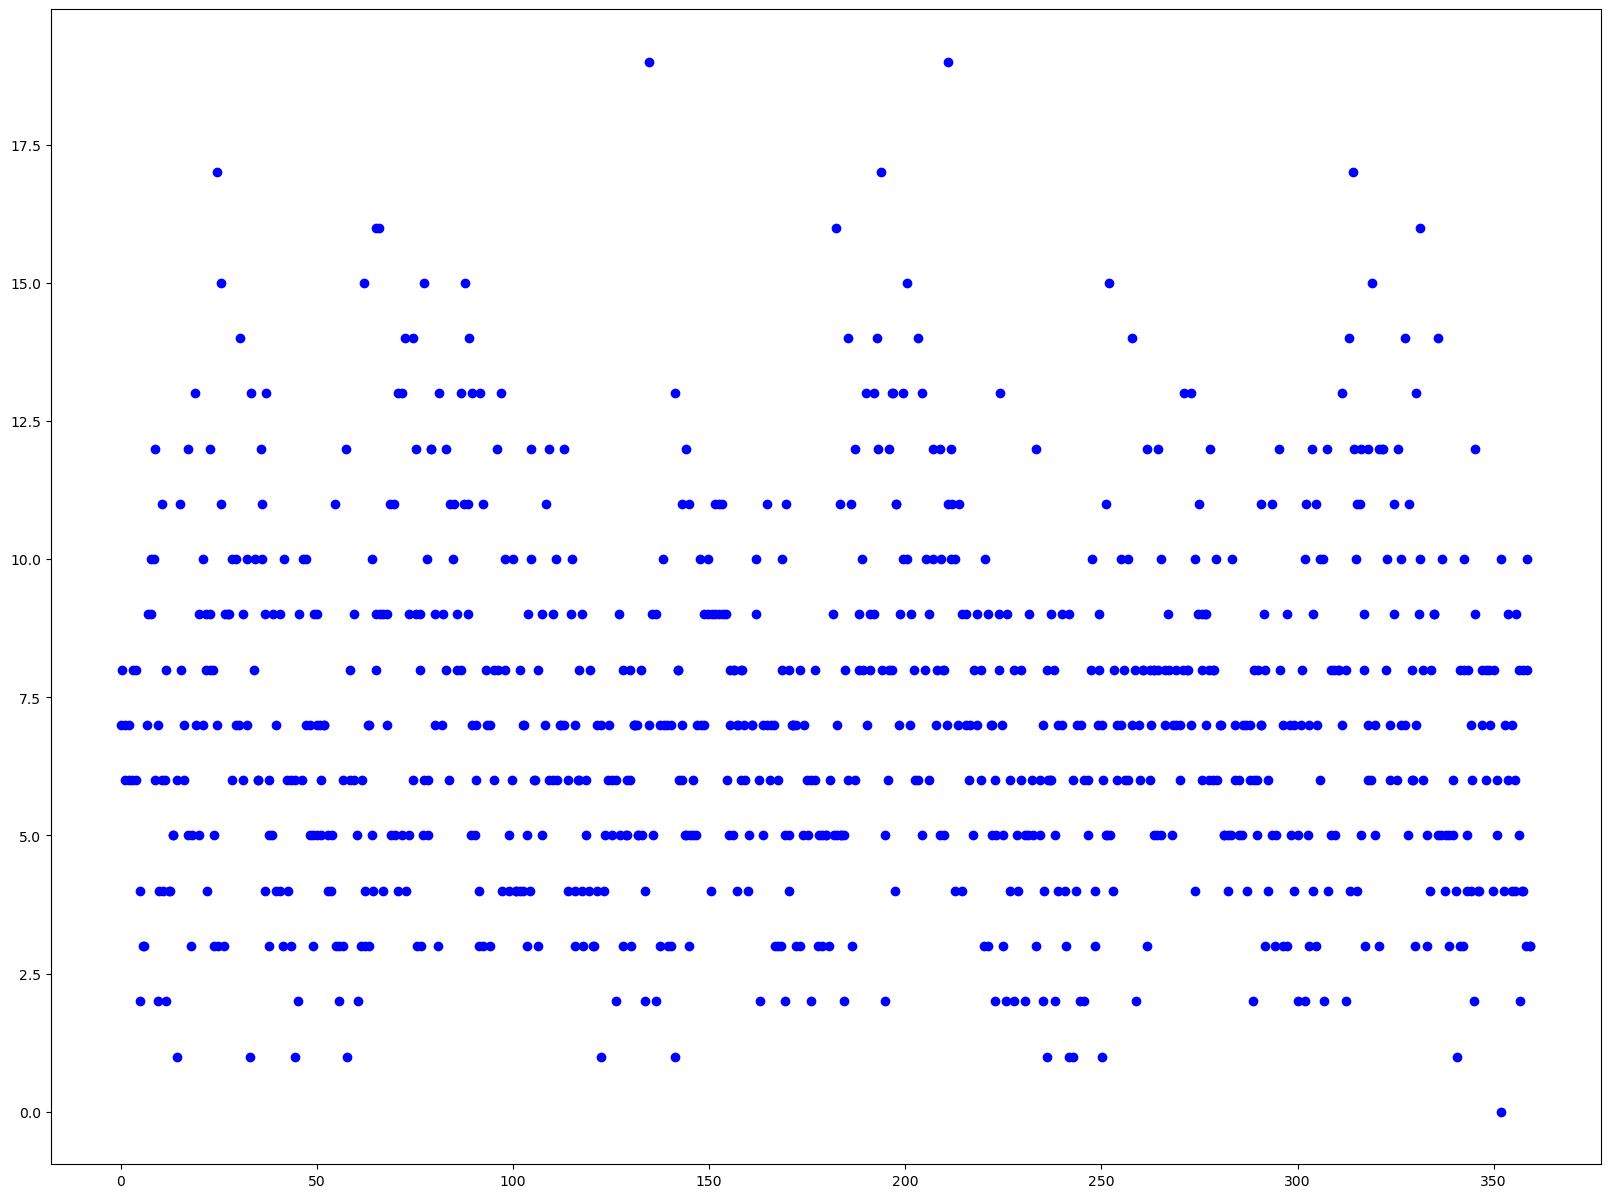

In [12]:
samplePlot(solar_deg, counts, 30000)

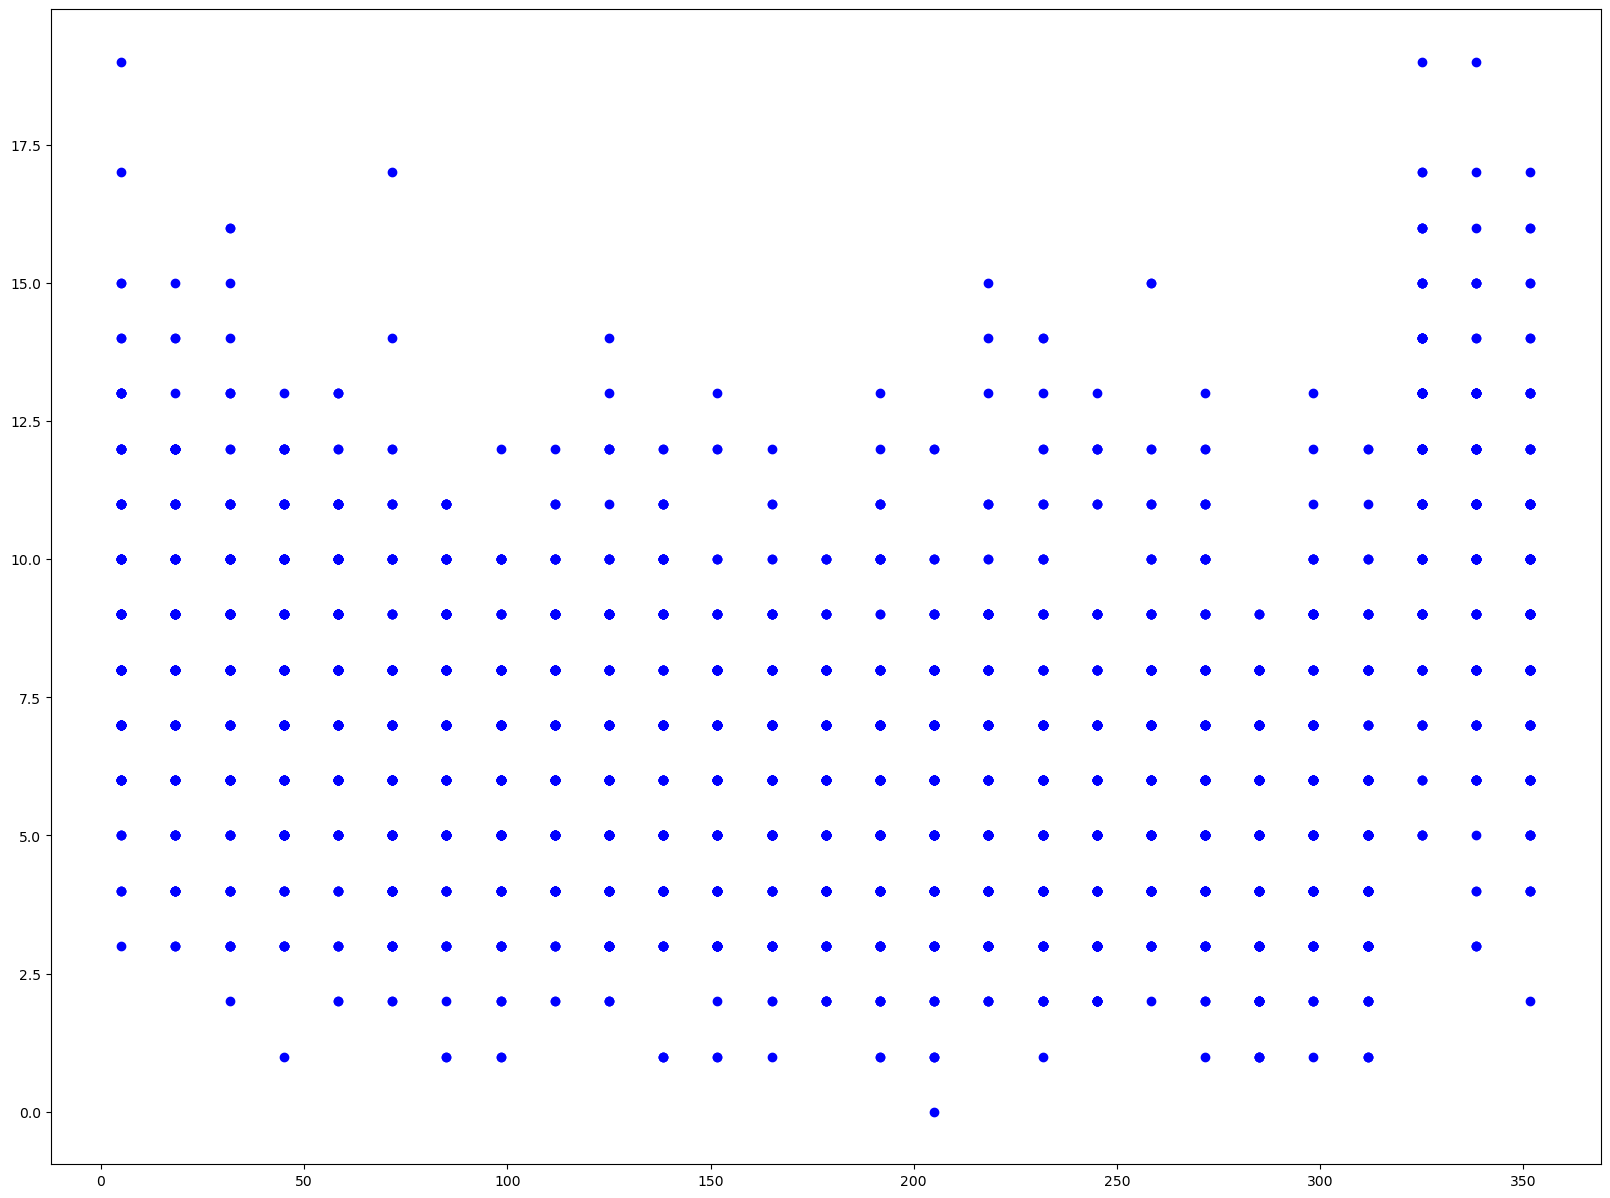

In [13]:
samplePlot(earth_long, counts, 10000)

From the above plots we can observe different relationships between different features in the dataset and the counts. For the above graph, I plotted time v. counts and solar degree v. counts with a point for every 50000 points and Earth longitude v. counts with a point for every 10000 points for clearer representation of the data. From above graphs we can see that because the counts are discrete and almost all other values have a relative smaller x unit, the plot shows some concentrated horizontal lines mainly in the center of the plot with lower density on the edges. 

#### 2)

In [14]:
mean = np.mean(counts)
mean

7.09730524315952

In [15]:
variance = mean*mean
variance

50.371741714579606

The background is changing and the gross variance of the counts is about 50.

#### 3)

In [16]:
np.max(counts)

30.0

In [17]:
np.min(counts)

0.0

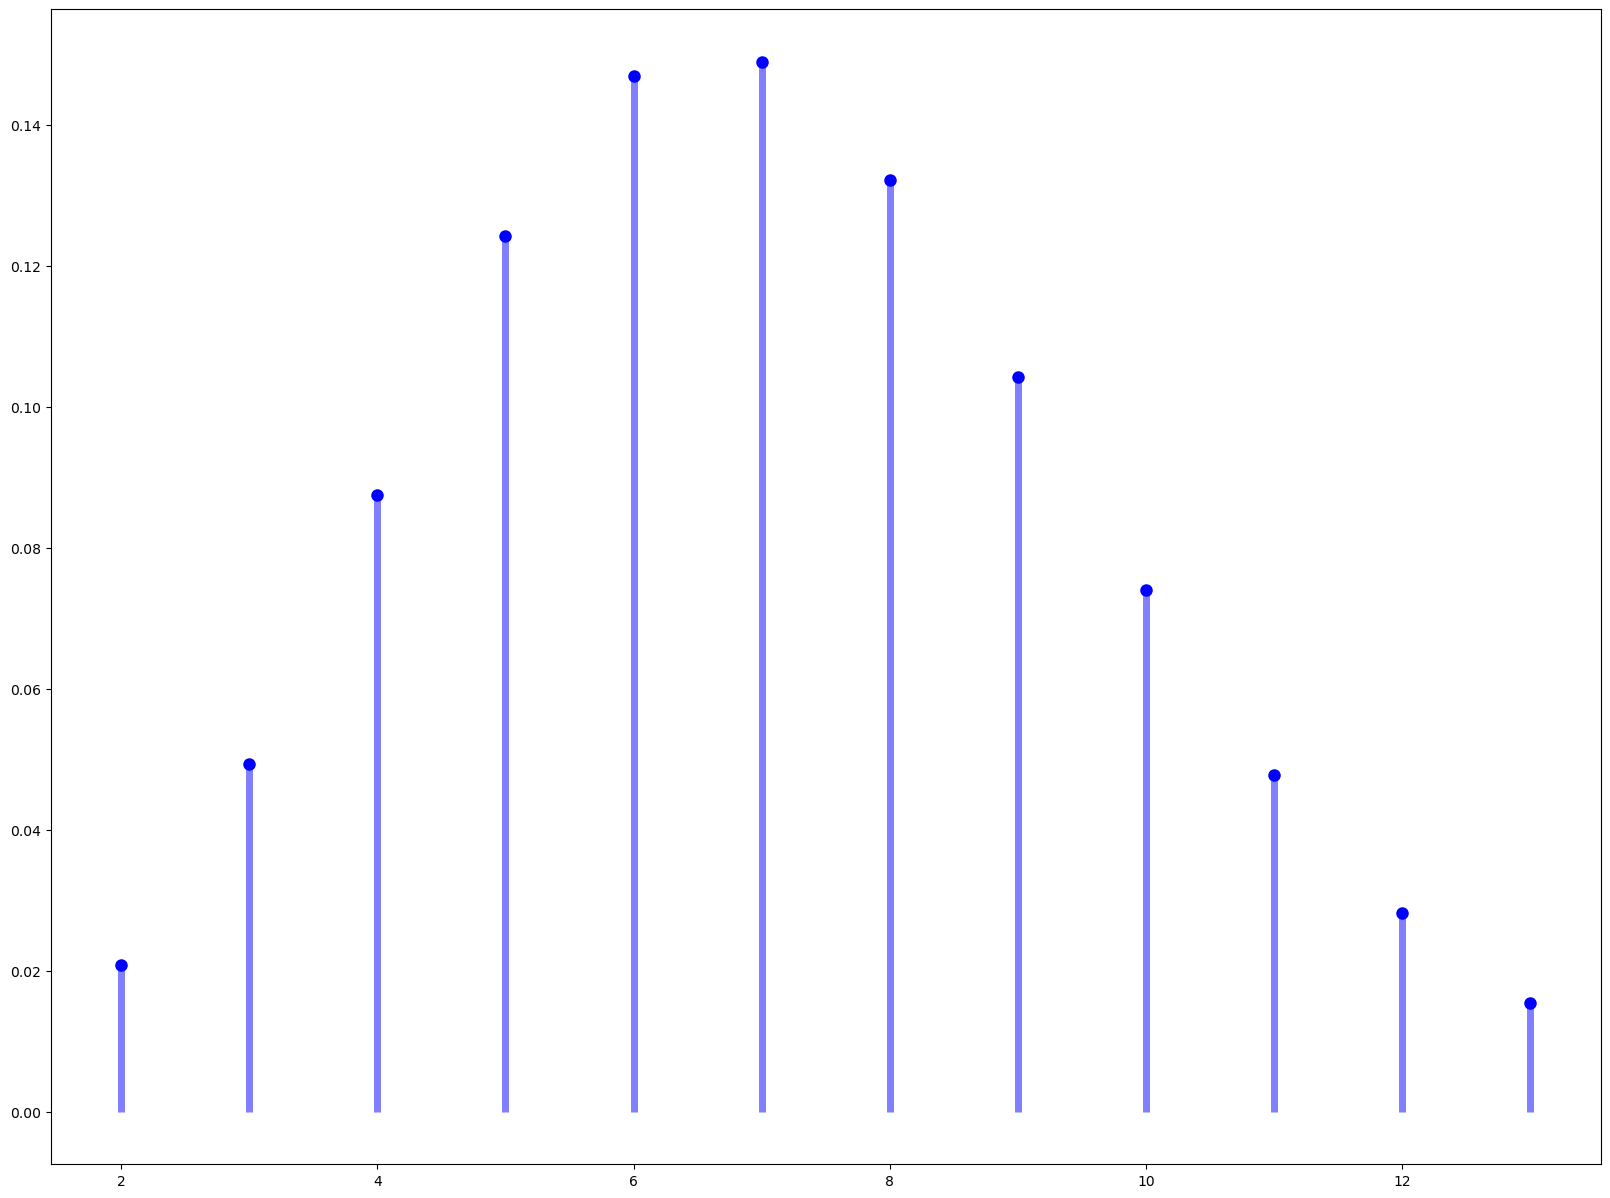

In [18]:
fig, ax = plt.subplots(1, 1)
x = np.arange(poisson.ppf(0.01, mean),
              poisson.ppf(0.99, mean))
ax.plot(x, poisson.pmf(x, mean), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mean), colors='b', lw=5, alpha=0.5)

In [19]:
sigma5 = 1/3.5e6
det = stats.poisson.ppf(1-sigma5, mean)
det

24.0

In [20]:
len(counts)

25920001

In [21]:
index = 0
newdata = np.ndarray(shape=(4,25920001))
for i in range(25920001):
    if counts[i] < 24:
        newdata[:,index]=data[:,i]
        index=index+1

In [22]:
newdata[:,0]

array([9.40680016e+08, 3.15000000e+02, 4.50000000e+01, 1.00000000e+01])

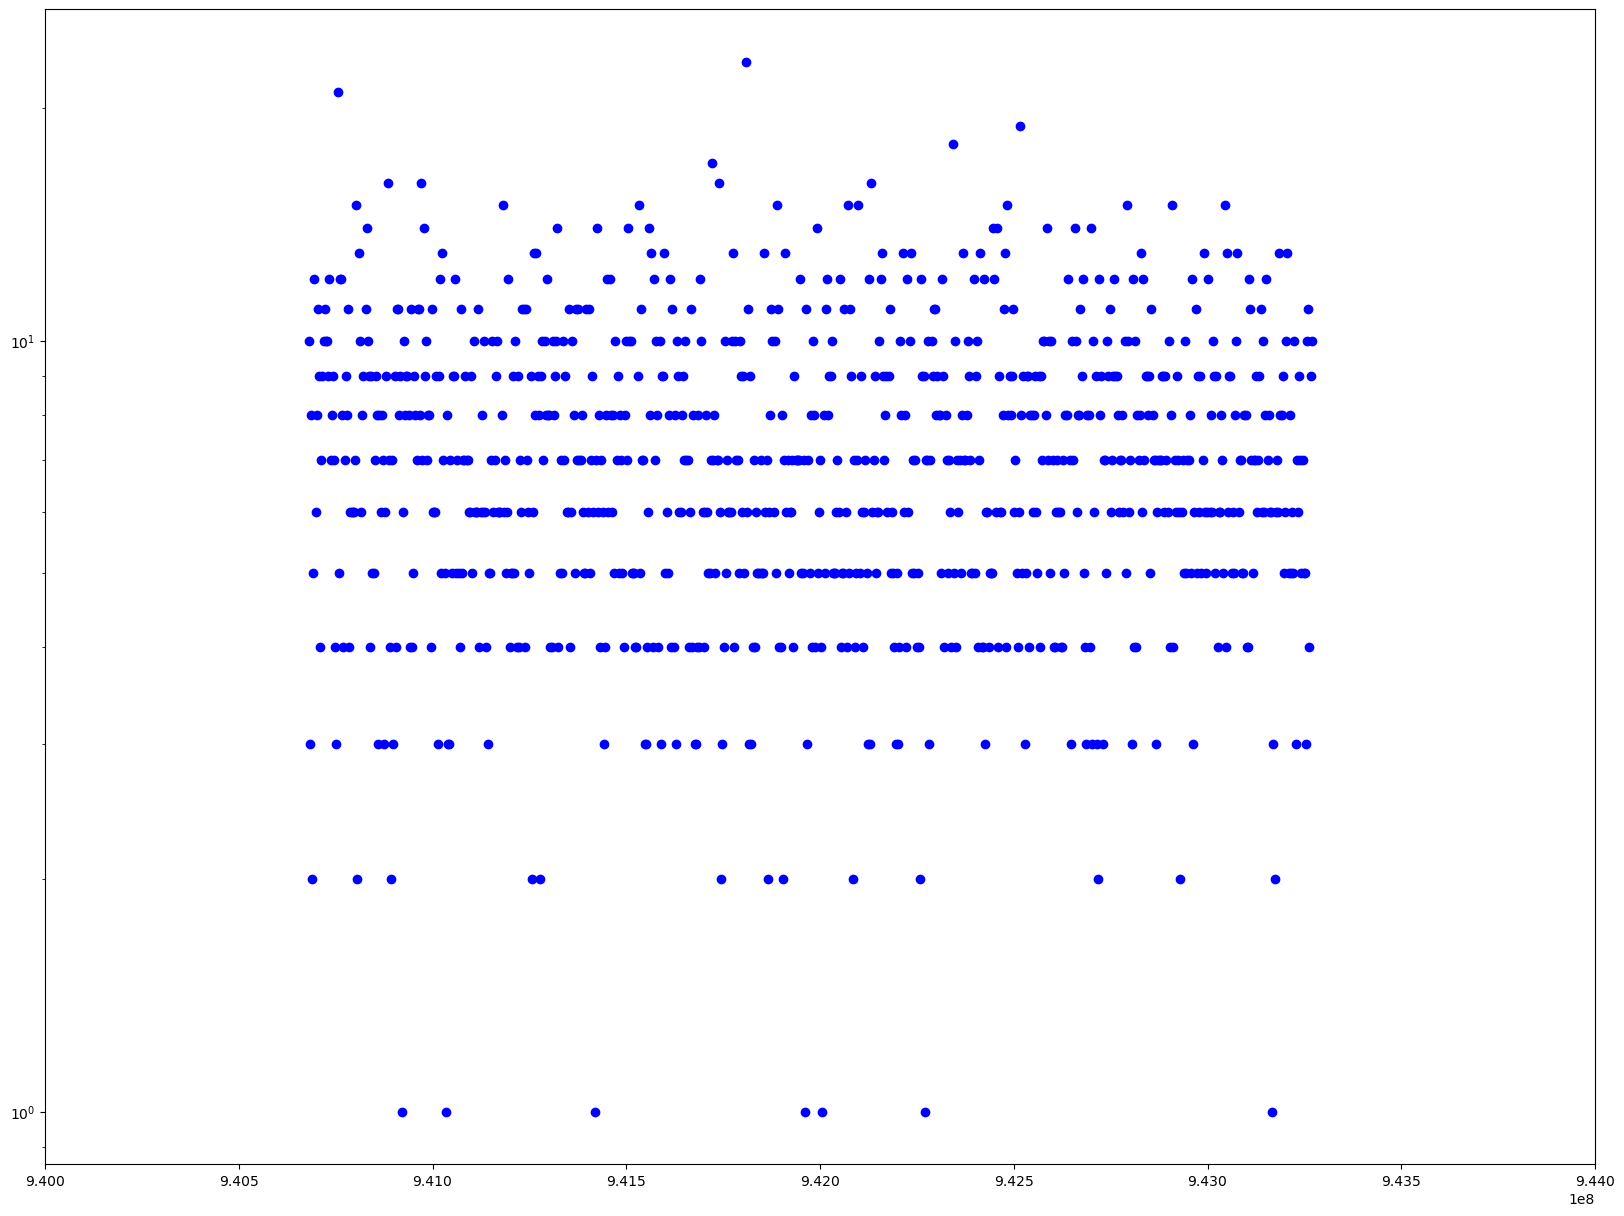

In [33]:
fig, ax = plt.subplots(1, 1)
x = newdata[0,:]
y = newdata[3,:]
size = 30000
ax.plot(x[0:len(x):size], y[0:len(y):size], 'bo')
plt.yscale('log')
plt.xlim(9.4*int(1e8),9.44*int(1e8))
plt.show()

The model looks like it is signal free data which still does not show a consistent model. 